# Subsetting

Review core methods to select data from a `pandas.DataFrame`

## Read in CSV

To read in a CSV file as a `pandas.DataFrame` we use the `pandas.read_csv` function:

In [1]:
import pandas as pd

# Read in file, argument is file path
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Print first five rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


Birds that were surveyed in four wetlands:

- Carpinteria salt marsh (CSM)
- Mugu lagoon (MUL)
- San Dieguito Wetland (SDW)
- Tijiuana Estuary (TJE)

Values from the second column to the last column = number of different bird species recorded across the survey sites in each wetland during spring, winter, and fall, for a given year. 

In [2]:
# View column names and types of each variable
print(df.columns)
print(df.dtypes)

Index(['year', 'CSM_winter', 'CSM_spring', 'CSM_fall', 'MUL_winter',
       'MUL_spring', 'MUL_fall', 'SDW_winter', 'SDW_spring', 'SDW_fall',
       'TJE_winter', 'TJE_spring', 'TJE_fall'],
      dtype='object')
year            int64
CSM_winter    float64
CSM_spring    float64
CSM_fall      float64
MUL_winter    float64
MUL_spring    float64
MUL_fall      float64
SDW_winter    float64
SDW_spring    float64
SDW_fall      float64
TJE_winter    float64
TJE_spring    float64
TJE_fall      float64
dtype: object


In [3]:
# Print df shape: output is a tuple with # rows, # columns
df.shape

(14, 13)

## Selecting a single column

Simplest case: select a single column by column name

General syntax:
```python
df['column_name']
```

This is an example of **label-based subsetting**, which means we want to select data from df using the *names* of the columns, not their position. 

## Example
Select the number of bird species at Mugu lagoon in spring

In [4]:
# Select a single column by using []
mul_spring = df['MUL_spring']

In [5]:
mul_spring

0      NaN
1     52.0
2     58.0
3     58.0
4     52.0
5     50.0
6     48.0
7     54.0
8     54.0
9     52.0
10     NaN
11    55.0
12    55.0
13    59.0
Name: MUL_spring, dtype: float64

In [6]:
# Confirm the type of output
type(mul_spring)

pandas.core.series.Series

Recall: we can think of a pd df as a dictionary of its columns.
Then, we can access a single column using the column name as the *key*, just like we would in a dictionary:

`df['column_name']`

We can also do label-based subsetting of a single column using attribute syntax:
```python
df.column_name
```

Example:

In [7]:
df.MUL_spring

0      NaN
1     52.0
2     58.0
3     58.0
4     52.0
5     50.0
6     48.0
7     54.0
8     54.0
9     52.0
10     NaN
11    55.0
12    55.0
13    59.0
Name: MUL_spring, dtype: float64

**Favor `df['column_name']` instead of `df.column_name`**

why?

- `df['column_name']` avoids conflicts with `pd.DataFrames` methods and attributes. For example, if the df has a column named `count` it's ambiguous whether pd.count is referring to count method or to the count column.  
- `df['column_name']` can take any name
`df.column_name` only works with no spaces or special characters

## Selecting multiple columns

### ... using a list of column names

Select multiple columns in a single call by passing a list

```python
df[ ['col1', 'col2', 'col100'] ]
```

Notice the double square brackets, bc we are passing a list of names `['col1', 'col2', 'col100']` to the selection brackets

### Example

In [8]:
# Select the columns `TJE_winter` and `TJE_fall`
tje_wf = df[['TJE_winter', 'TJE_fall']]
tje_wf

,TJE_winter,TJE_fall
0,NaN,81.0
1,67.0,NaN
2,70.0,69.0
3,69.0,64.0
4,60.0,62.0
5,73.0,64.0
6,76.0,58.0
7,72.0,57.0
8,66.0,55.0
9,63.0,50.0


### ... using a slice

To select a slice of the columns, we'll use a special case of the **`loc` selection**, general syntax:

```python
df.loc[ : , 'column_start': 'column_end']
```

Starting and ending points of the column slice we want to subset from the df

Notice:

- the first value passed to `loc` is used for rows, the second space is for columns. using ` : ` as the row-selection parameter selects all the rows
- the slice of hte resulting data is inclusive, it includes both endpoints of the slice. 

In [9]:
# Select columns btwn `CSM_winter` and `MUL_fall`
csm_mul = df.loc[:, 'CSM_winter':'MUL_fall']
csm_mul.head()

,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall
0,39.0,40.0,50.0,45.0,NaN,61.0
1,48.0,44.0,NaN,58.0,52.0,NaN
2,51.0,43.0,49.0,57.0,58.0,53.0
3,42.0,46.0,38.0,60.0,58.0,62.0
4,38.0,43.0,45.0,49.0,52.0,57.0


## Selecting rows

### ... using a condition

```python
df[condition_on_rows]
```

The condition on rows can be many things:

### Example

We are interested in data after 2020. 

In [10]:
# Select all rows w year > 2020
post_2020 = df[df['year'] > 2020]
post_2020

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
11,2021,47.0,44.0,53.0,54.0,55.0,60.0,57.0,58.0,57.0,53.0,68.0,51.0
12,2022,40.0,46.0,49.0,60.0,55.0,65.0,57.0,60.0,57.0,60.0,61.0,60.0
13,2023,56.0,43.0,36.0,72.0,59.0,53.0,64.0,63.0,33.0,60.0,56.0,38.0


condition for rows = `df['year'] > 2020`
this is a `pandas.Series` with boooooolean values (`True` and `False`) indiating which rows satisfy the condition

In [11]:
# Check the type of df['year'] > 2020
print(type(df['year'] > 2020))

# Print boolean series
df['year'] > 2020

<class 'pandas.core.series.Series'>


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
Name: year, dtype: bool

This series acts as a mask for the df, only keeps the things that are true. 

### Check in
Subset of SDW has at least 75 species recorded during spring

In [12]:
sdw_spring = df[df['SDW_spring'] >= 75]
sdw_spring

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


## Basic Plotting

### Check-in exercise 1
Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.

Use the isna() method for pandas.Series and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey.

In [23]:
mul_spring = df[['MUL_spring', 'year']].set_index('year')
mul_spring

,MUL_spring
year,
2010,NaN
2011,52.0
2012,58.0
2013,58.0
2014,52.0
2015,50.0
2016,48.0
2017,54.0
2018,54.0


<AxesSubplot:title={'center':'Graph of spring bird observations at Mugu lagoon'}, xlabel='Year', ylabel='Observations'>

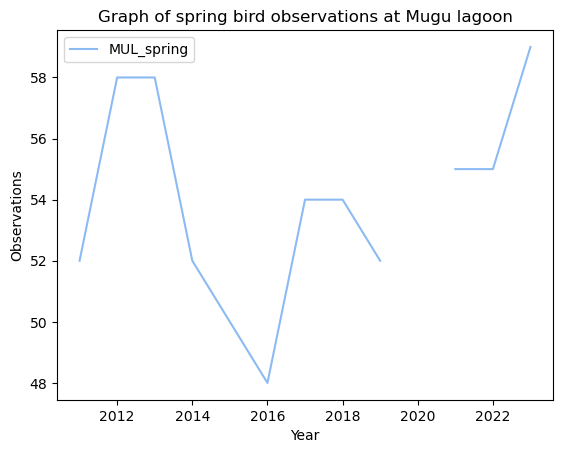

In [20]:
mul_spring.plot(color = '#8CBBF4', title = 'Graph of spring bird observations at Mugu lagoon', ylabel = 'Observations', xlabel = 'Year')

In [26]:
mul_na = mul_spring.isna() == True
mul_na

,MUL_spring
year,
2010,True
2011,False
2012,False
2013,False
2014,False
2015,False
2016,False
2017,False
2018,False


Without running the code, give a step-by-step breakdown of what this code is doing:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

Is this code modifying the data frame df? Why or why not?

The code is not modifying the data frame

Run the code and examine the graph. Review the data description. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

<AxesSubplot:xlabel='year'>

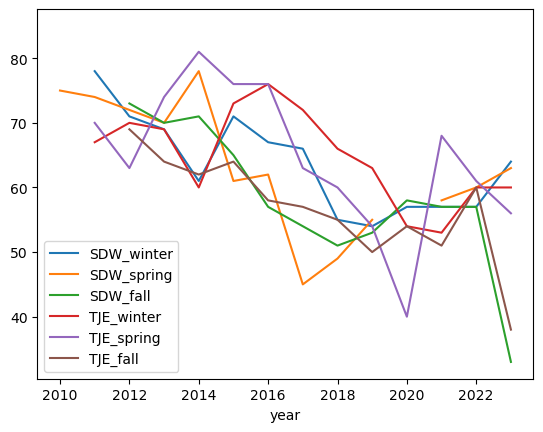

In [27]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()